# Pull in the Dataset

In [1]:
import pandas as pd
import sys
import os


# Fixing routing issue
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

# Load the dataset
data_path = '../data/raw/twcs/twcs.csv'
df = pd.read_csv(data_path)

df = df.sample(n=10000, random_state=42).reset_index(drop=True)


# Basic Info and Preview

In [2]:
# Basic Info
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("Coulmn names:", df.columns.tolist())

# Peep the first five rows
display(df.head())

Rows: 10000
Columns: 7
Coulmn names: ['tweet_id', 'author_id', 'inbound', 'created_at', 'text', 'response_tweet_id', 'in_response_to_tweet_id']


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,192624,161253,True,Wed Oct 04 13:59:33 +0000 2017,@161252 What's that egg website people talk about,192623,192625.0
1,738238,296574,True,Fri Oct 06 18:29:06 +0000 2017,Why!🤷🏻‍♀️ #iOS11 @AppleSupport https://t.co/BX...,738237,NaN
2,2414302,AppleSupport,False,Tue Nov 14 17:38:01 +0000 2017,@693975 We can assist you. We recommend updati...,2414303,2414304.0
3,1793929,539096,True,Thu Oct 12 06:04:41 +0000 2017,@331912 @115955 Thats better than having an un...,1793928,1793930.0
4,2088018,617376,True,Mon Nov 06 20:30:49 +0000 2017,@VirginAmerica is probably one of the best air...,2088017,NaN


# Missing Value Check

In [3]:
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0]

response_tweet_id          3772
in_response_to_tweet_id    2769
dtype: int64

# Category Distribution

In [4]:
if 'category' in df.columns:
    print(df['category'].value_counts())

# Tweet Length Stats and Histogram

count    10000.000000
mean       114.738500
std         53.208697
min          2.000000
25%         79.000000
50%        116.000000
75%        140.000000
max        392.000000
Name: tweet_length, dtype: float64


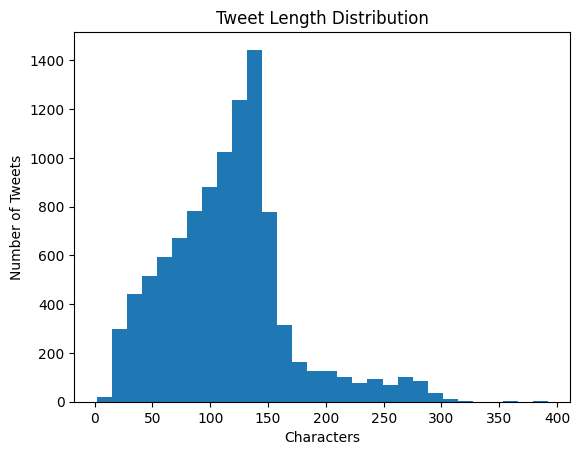

In [5]:
df['tweet_length'] = df['text'].astype(str).apply(len)
print(df['tweet_length'].describe())

import matplotlib.pyplot as plt
plt.hist(df['tweet_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Tweets")
plt.show()

# Cleaning Tweets

In [8]:
from scripts.preprocess import clean_tweet_text, is_question, get_sentiment_score

# Run the is_question function on data before cleaning
df['is_question'] = df['text'].apply(is_question)

# Run the get_sentiment_score function on data before cleaning
df['sentiment_score'] = df['text'].apply(get_sentiment_score)

# Apply the function to data in text column for sample dataset
df['cleaned_text'] = df['text'].apply(clean_tweet_text)

# Drops empty or null cleaned rows
df = df[df['cleaned_text'].notna()]
df = df[df['cleaned_text'].str.strip() != '']

# Create Cleaned Tweets CSV File

In [7]:
df.to_csv("../data/processed/cleaned_tweets.csv", index=False, encoding='utf-8')
print("Cleaned tweets have been saved to data/processed/cleaned_tweets.csv")

Cleaned tweets have been saved to data/processed/cleaned_tweets.csv
